### Program to play with the problem below for any grid dimension:
(Problem described [here](https://brilliant.org/weekly-problems/2017-06-19/intermediate/?p=2))

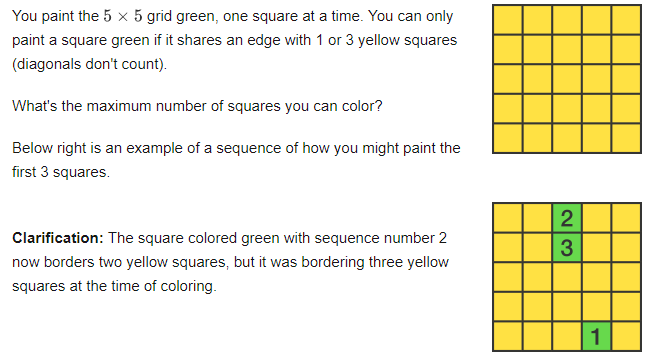

Constraints:
* Cells along the diagonal cannot be painted
* Cells along the diagonal cannot be counted as 'edge neighbours'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def initialize_grid(rows, columns, initial_cell):
    
    grid = np.zeros((rows, columns))
    
    # paint initial cell if specified
    if initial_cell:
        grid[initial_cell[0],initial_cell[1]] = 1
    
    return grid

In [ ]:
def paint_cell(grid, row, col):
    
    edges = 0
    
    left = col - 1
    right = col + 1
    up = row - 1
    down = row + 1
    
    neighbours = [left, right, up, down]
    
    for index in range(len(neighbours)):
        try: # in case of index out of range
            if(neighbours[index] >= 0): # avoid cycling around to the opposite array boundary
                if (index == 0 or index == 1): # column index
                    if (row != neighbours[index]) & (grid[row, neighbours[index]] != 1): # non-diagonal and unpainted cell
                        edges += 1
                else: #row index
                    if (col != neighbours[index]) & (grid[neighbours[index], col] != 1): # non-diagonal and unpainted cell
                        edges += 1
        except:
            pass
    
    if (edges == 1 or edges == 3):
        grid[row,col] = 1
        
    return grid

In [ ]:
def paint_grid(grid, initial_cell = None):
    
    # paint initial cell if specified
    if initial_cell:
        grid[initial_cell[0],initial_cell[1]] = 1
    
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            
            if i == j: # cell along the diagonal
                continue

            grid = paint_cell(grid, i, j)
            
    return grid

In [ ]:
def max_grid_paint(grid, rows, columns, initial_cell):
    
    if grid:
        rows = len(grid)
        columns = len(grid[0])
    else:
        if initial_cell:
            grid = initialize_grid(rows, columns, initial_cell)# np.random.choice(min(rows, columns), 2, replace = False))
        else:
            grid = initialize_grid(rows, columns, None)
    
    new_cells_painted = []
    
    while(True): # iterate until no possible cell remains to be painted
        
        initial_cells_painted = np.sum(grid)

        grid = paint_grid(grid)
        cells_painted = np.sum(grid)
                    
        delta_cells_painted = cells_painted - initial_cells_painted
        
        if delta_cells_painted == 0:
            break
            
        new_cells_painted.append(delta_cells_painted)
        
    if initial_cell:
        new_cells_painted[0] += 1 # to account for cell that was already painted at the beginning
                
    return grid, cells_painted, new_cells_painted

In [ ]:
def explore_grid_paint(rows, cols):
    
    params = {}

    for i in range(rows):
        for j in range(cols):

            if i == j: # do not use cells in diagonal as initial cells
                continue

            params[i, j] = max_grid_paint(None, rows, cols, [i, j])
            
    return params

In [ ]:
def display_results(rows, cols):

    params = explore_grid_paint(rows, cols)

    print('RESULTS FOR %d X %d GRID \n' %(rows, cols))
    print('Initial indices with max and min results:\n')

    # calling 'max' or 'min' based on 'item' returns the entire row (a dict) that contains 'item'

    # item[1][1] holds the number of cells painted, max_painted and min_painted hold the entire row containing 'item'
    min_painted = min(params.items(), key = lambda item: item[1][1])
    print('Min. total cells painted: %d' %min_painted[1][1])
    print('Initialized at: ', end = '')
    print(min_painted[0])
    print('Number of iterations: %d' %len(min_painted[1][2]))
    print('Cells painted per iteration: ', end = '')
    print(min_painted[1][2])
    print('Grid:')
    %matplotlib inline
    plt.imshow(min_painted[1][0])
    plt.grid(True)
    plt.show()

    print()
    max_painted = max(params.items(), key = lambda item: item[1][1])
    print('Max. total cells painted: %d' %max_painted[1][1])
    print('Initialized at: ', end = '')
    print(max_painted[0])
    print('Number of iterations: %d' %len(max_painted[1][2]))
    print('Cells painted per iteration: ', end = '')
    print(max_painted[1][2])
    print('Grid:')
    %matplotlib inline
    plt.imshow(max_painted[1][0])
    plt.grid(True)
    plt.show()

    # item[1][2] holds the list of cells painted per iteration, min_iters and max_iters hold the entire row containing 'item'

    print('\n')
    min_iters = min(params.items(), key = lambda item: len(item[1][2]))
    print('Smallest number of iterations: %d' %len(min_iters[1][2]))
    print('Initialized at: ', end = '')
    print(min_iters[0])
    print('Cells painted per iteration: ', end = '')
    print(min_iters[1][2])

    print()
    max_iters = max(params.items(), key = lambda item: len(item[1][2]))
    print('Highest number of iterations: %d' %len(max_iters[1][2]))
    print('Initialized at: ', end = '')
    print(max_iters[0])
    print('Cells painted per iteration: ', end = '')
    print(max_iters[1][2])

    print('\n')
    min_first_painted = min(params.items(), key = lambda item: item[1][2][0])
    print('Min. cells painted in first iteration: %d' %min_first_painted[1][2][0])
    print('Initialized at: ', end = '')
    print(min_first_painted[0])
    print('Cells painted per iteration: ', end = '')
    print(min_first_painted[1][2])

    print()
    min_painted_per_iter = min(params.items(), key = lambda item: min(item[1][2]))
    print('Min. cells painted in any iteration: %d' %min(min_painted_per_iter[1][2]))
    print('Initialized at: ', end = '')
    print(min_painted_per_iter[0])
    print('Cells painted per iteration: ', end = '')
    print(min_painted_per_iter[1][2])

    print('\n')
    max_first_painted = max(params.items(), key = lambda item: item[1][2][0])
    print('Max. cells painted in first iteration: %d' %max_first_painted[1][2][0])
    print('Initialized at: ', end = '')
    print(max_first_painted[0])
    print('Cells painted per iteration: ', end = '')
    print(max_first_painted[1][2])

    print()
    max_painted_per_iter = max(params.items(), key = lambda item: max(item[1][2]))
    print('Max. cells painted in any iteration: %d' %max(max_painted_per_iter[1][2]))
    print('Initialized at: ', end = '')
    print(max_painted_per_iter[0])
    print('Cells painted per iteration: ', end = '')
    print(max_painted_per_iter[1][2])    

RESULTS FOR 7 X 11 GRID 

Initial indices with max and min results:

Min. total cells painted: 46
Initialized at: (5, 9)
Number of iterations: 4
Cells painted per iteration: [30.0, 11.0, 4.0, 1.0]
Grid:


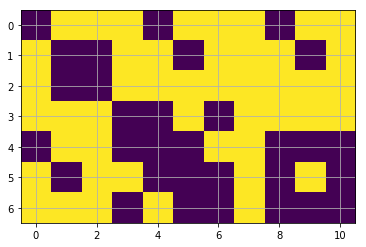


Max. total cells painted: 56
Initialized at: (2, 7)
Number of iterations: 3
Cells painted per iteration: [34.0, 17.0, 5.0]
Grid:


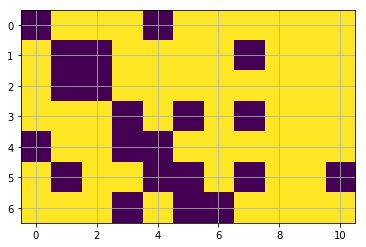



Smallest number of iterations: 3
Initialized at: (1, 3)
Cells painted per iteration: [35.0, 14.0, 5.0]

Highest number of iterations: 6
Initialized at: (2, 8)
Cells painted per iteration: [30.0, 13.0, 4.0, 1.0, 3.0, 1.0]


Min. cells painted in first iteration: 26
Initialized at: (0, 8)
Cells painted per iteration: [26.0, 16.0, 6.0, 1.0]

Min. cells painted in any iteration: 1
Initialized at: (5, 9)
Cells painted per iteration: [30.0, 11.0, 4.0, 1.0]


Max. cells painted in first iteration: 40
Initialized at: (0, 5)
Cells painted per iteration: [40.0, 11.0, 4.0]

Max. cells painted in any iteration: 40
Initialized at: (0, 5)
Cells painted per iteration: [40.0, 11.0, 4.0]


In [109]:
display_results(7, 11)